# Rain Prediction Using ANN ( Tensorflow 2 - Keras )

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\data science\Data scientist\Projects\P5 Rain pred using ANN\weatherAUS.csv")

## Data Cleaning 

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
len(df)

145460

In [5]:
df.head().isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      5
Sunshine         5
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         3
Cloud3pm         3
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.head().isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

## Data Visualization

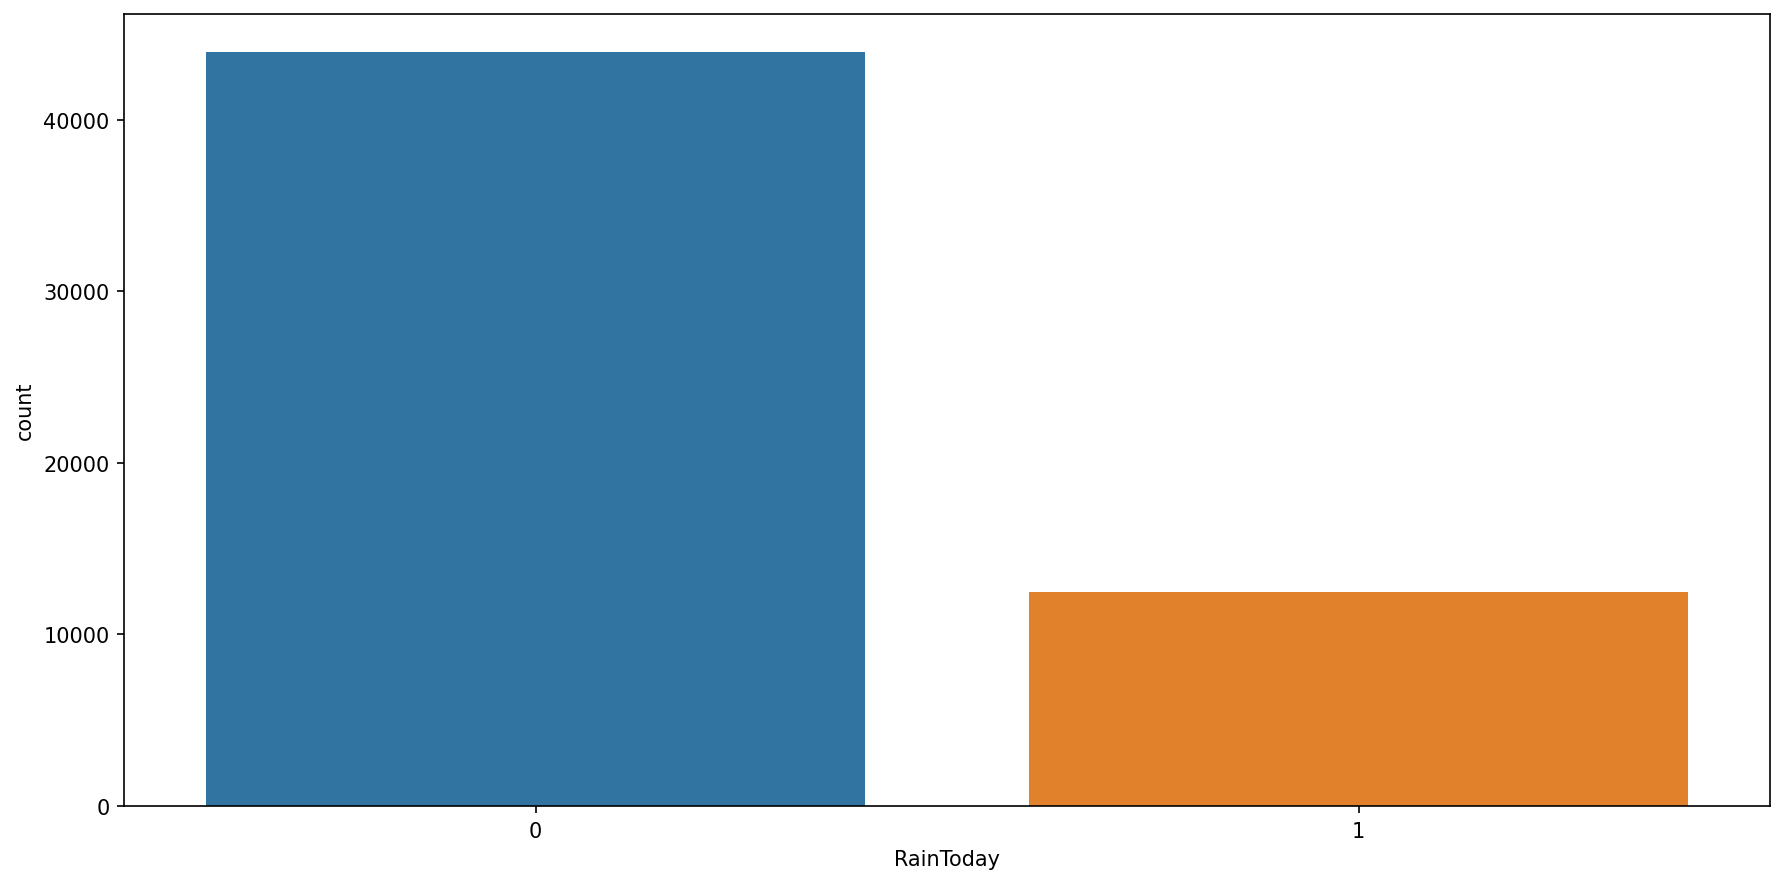

In [52]:
plt.figure(figsize=(12,6),dpi = 150)
sns.countplot(data = df,x='RainToday')
plt.tight_layout()

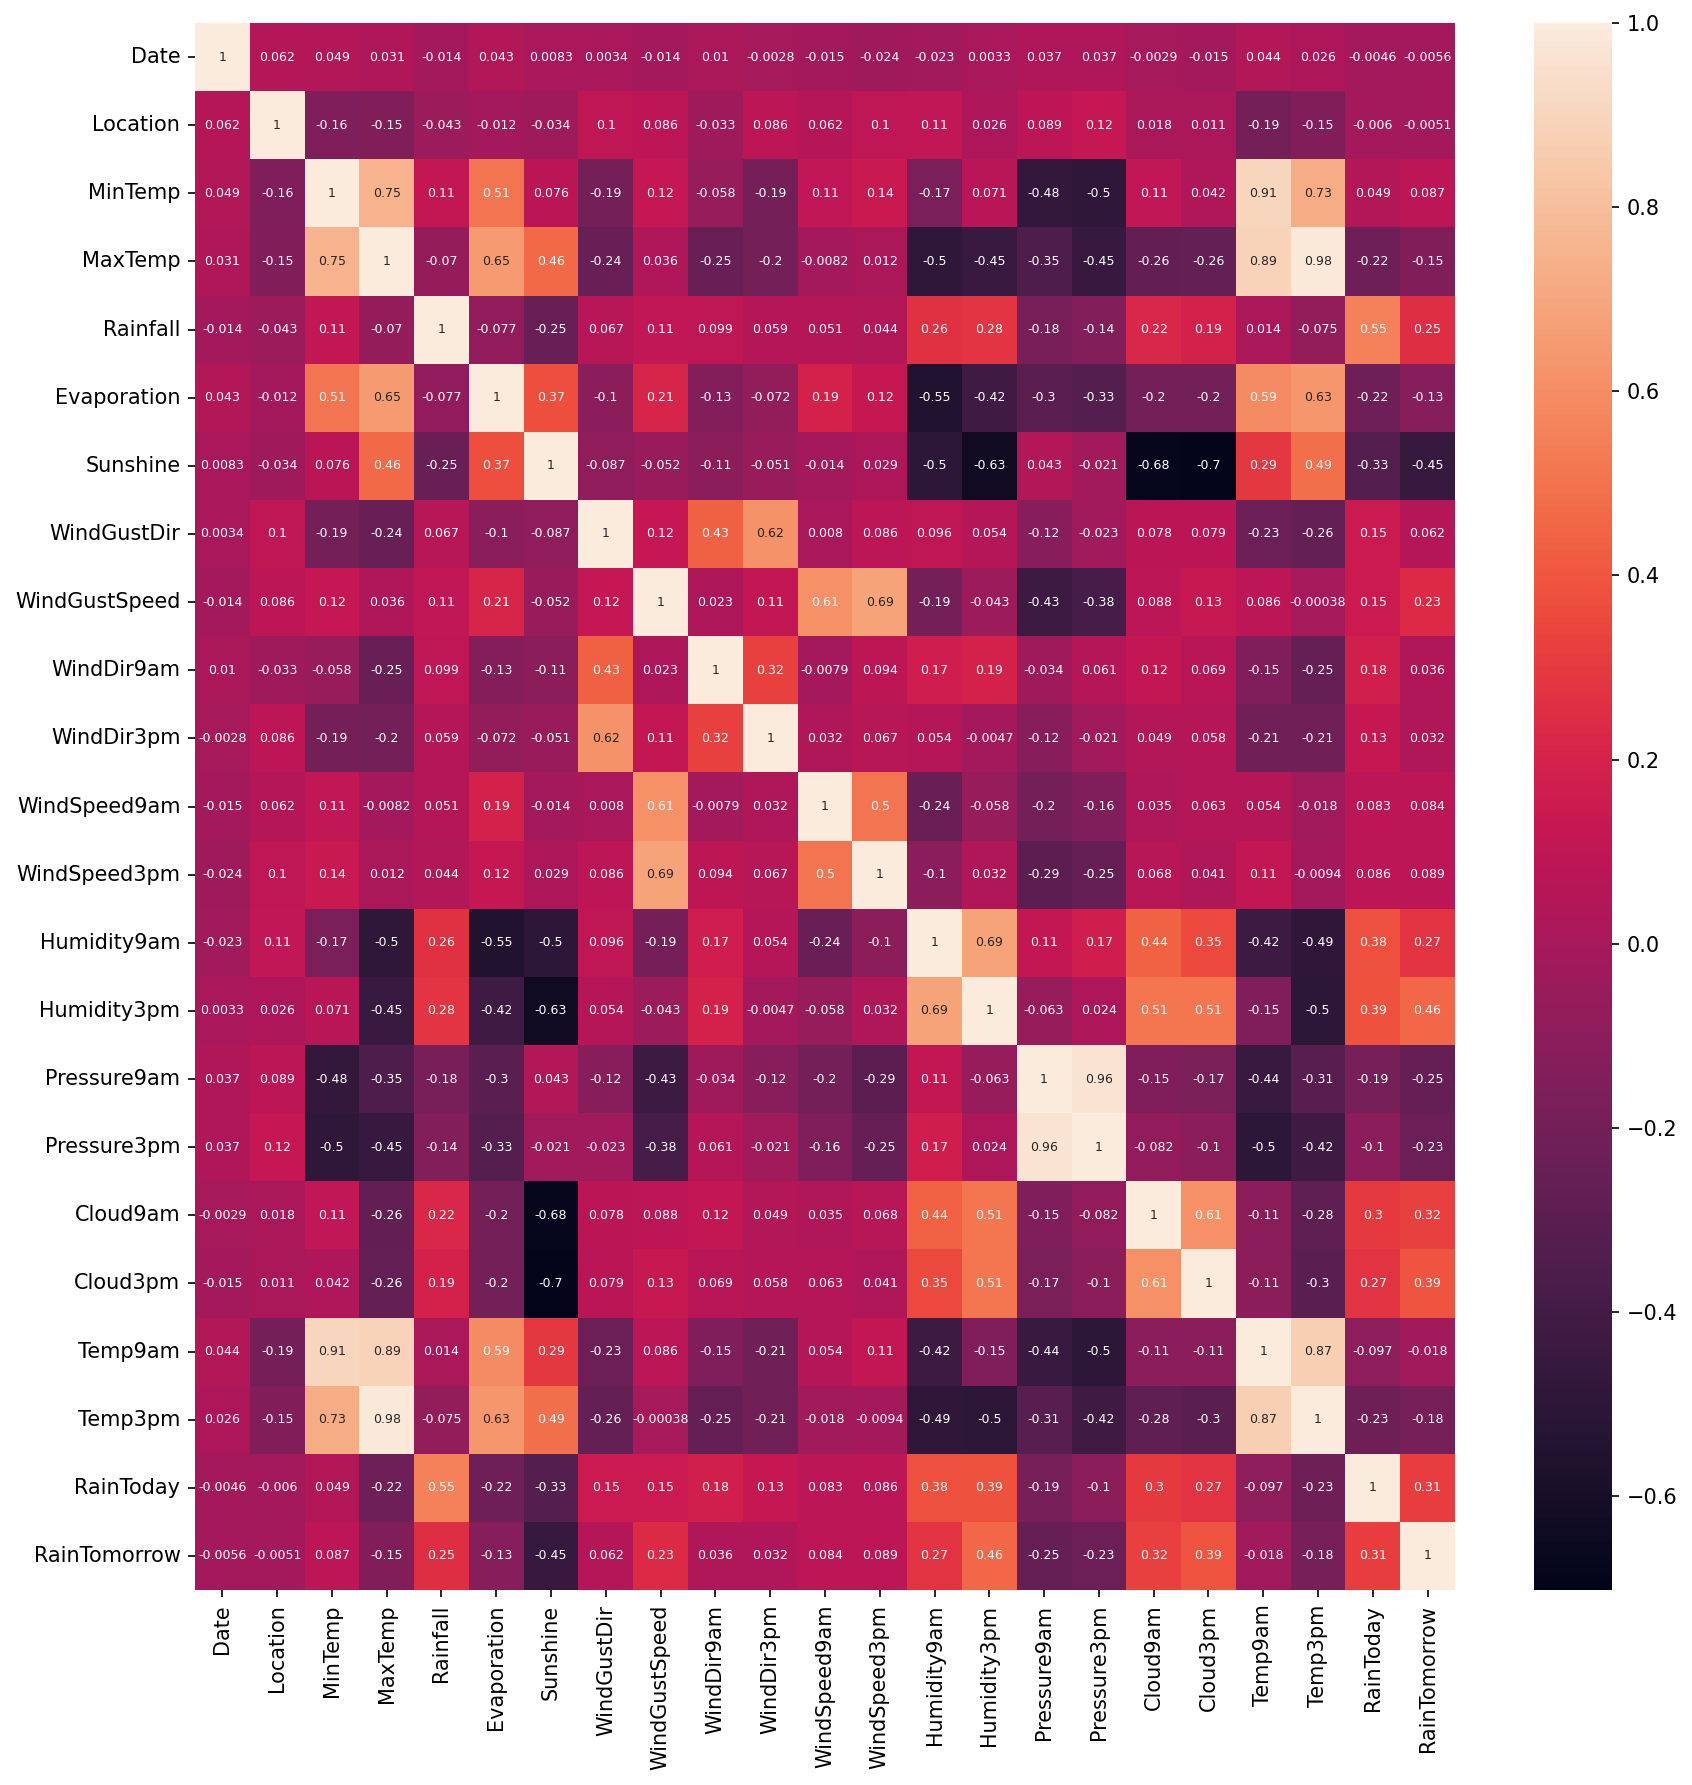

In [81]:
plt.figure(figsize=(12,12),dpi = 150)
sns.heatmap(df.corr(),annot = True,fmt='.2g',annot_kws={"size": 6})
plt.tight_layout()

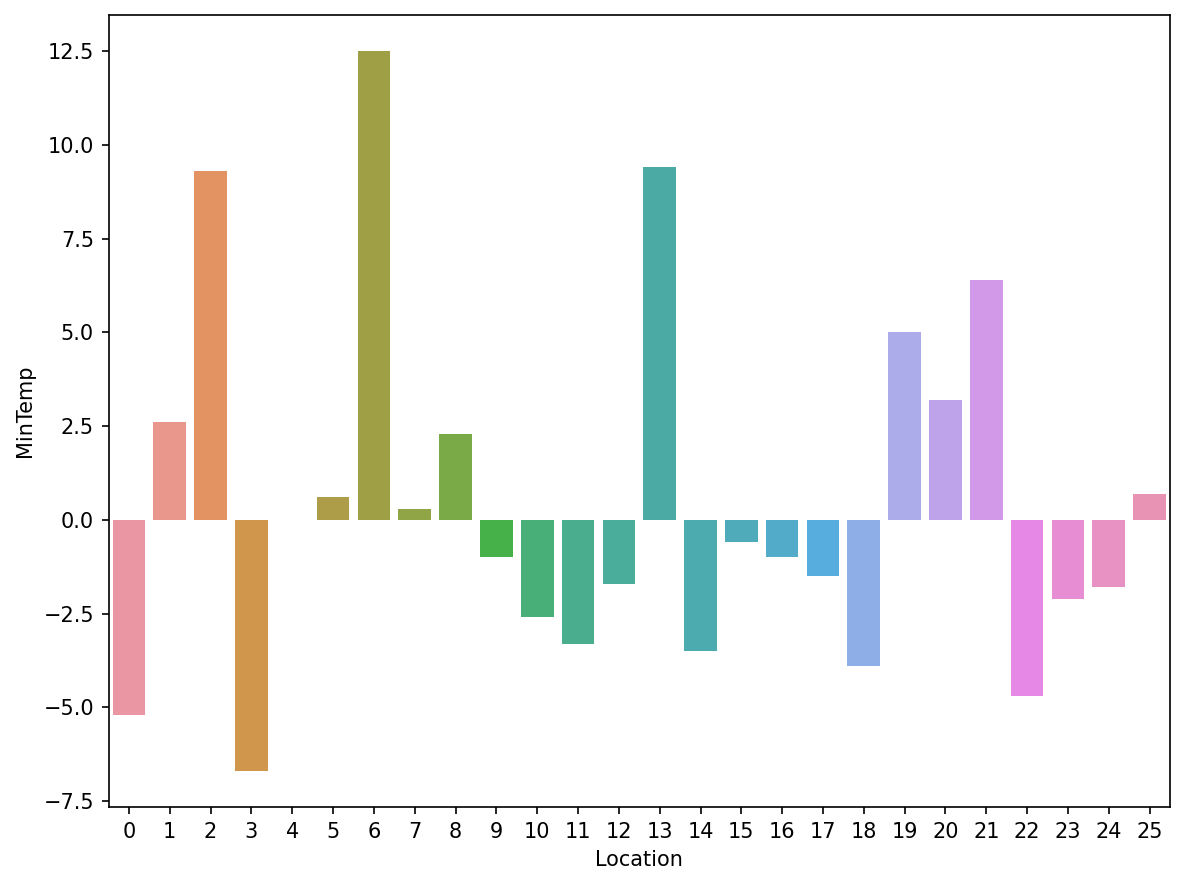

In [80]:
lowest = df.groupby(by='Location')['MinTemp'].min().reset_index()
plt.figure(figsize=(8, 6),dpi = 150)
sns.barplot(data=lowest, x='Location', y='MinTemp')
plt.tight_layout()

## Data Preparation

In [10]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_columns:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  int32  
 1   Location       56420 non-null  int32  
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  int32  
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  int32  
 10  WindDir3pm     56420 non-null  int32  
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [12]:
X = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow']

In [13]:
X.head(7)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,407,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
6050,408,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
6052,410,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
6053,411,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
6054,412,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0
6055,413,4,27.1,36.1,0.0,13.0,0.0,3,43.0,3,...,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0
6056,414,4,23.3,34.0,0.0,9.8,12.6,11,41.0,8,...,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0


In [14]:
print(y.unique())

[0 1]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(56420, 22)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
print(len(y_train))
print(len(scaled_X_train))
print(len(scaled_X_test))
print(len(y_test))

45136
45136
11284
11284


## Model Building

In [29]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras import callbacks
from keras.optimizers import Adam

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=10, 
    restore_best_weights=True,
)


model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(scaled_X_train,y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
1129/1129 [==============================] - 3s 2ms/step - loss: 0.4483 - accuracy: 0.7804 - val_loss: 0.3761 - val_accuracy: 0.7771
Epoch 2/150
1129/1129 [==============================] - 2s 2ms/step - loss: 0.4067 - accuracy: 0.7804 - val_loss: 0.3676 - val_accuracy: 0.7771
Epoch 3/150
1129/1129 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.7804 - val_loss: 0.3692 - val_accuracy: 0.7771
Epoch 4/150
1129/1129 [==============================] - 2s 2ms/step - loss: 0.3994 - accuracy: 0.7804 - val_loss: 0.3657 - val_accuracy: 0.7771
Epoch 5/150
1129/1129 [==============================] - 2s 2ms/step - loss: 0.4021 - accuracy: 0.7804 - val_loss: 0.3658 - val_accuracy: 0.7771
Epoch 6/150
1129/1129 [==============================] - 2s 2ms/step - loss: 0.3974 - accuracy: 0.7804 - val_loss: 0.3682 - val_accuracy: 0.7771
Epoch 7/150
1129/1129 [==============================] - 2s 2ms/step - loss: 0.3963 - accuracy: 0.7804 - val_loss: 0.3627 - val_ac

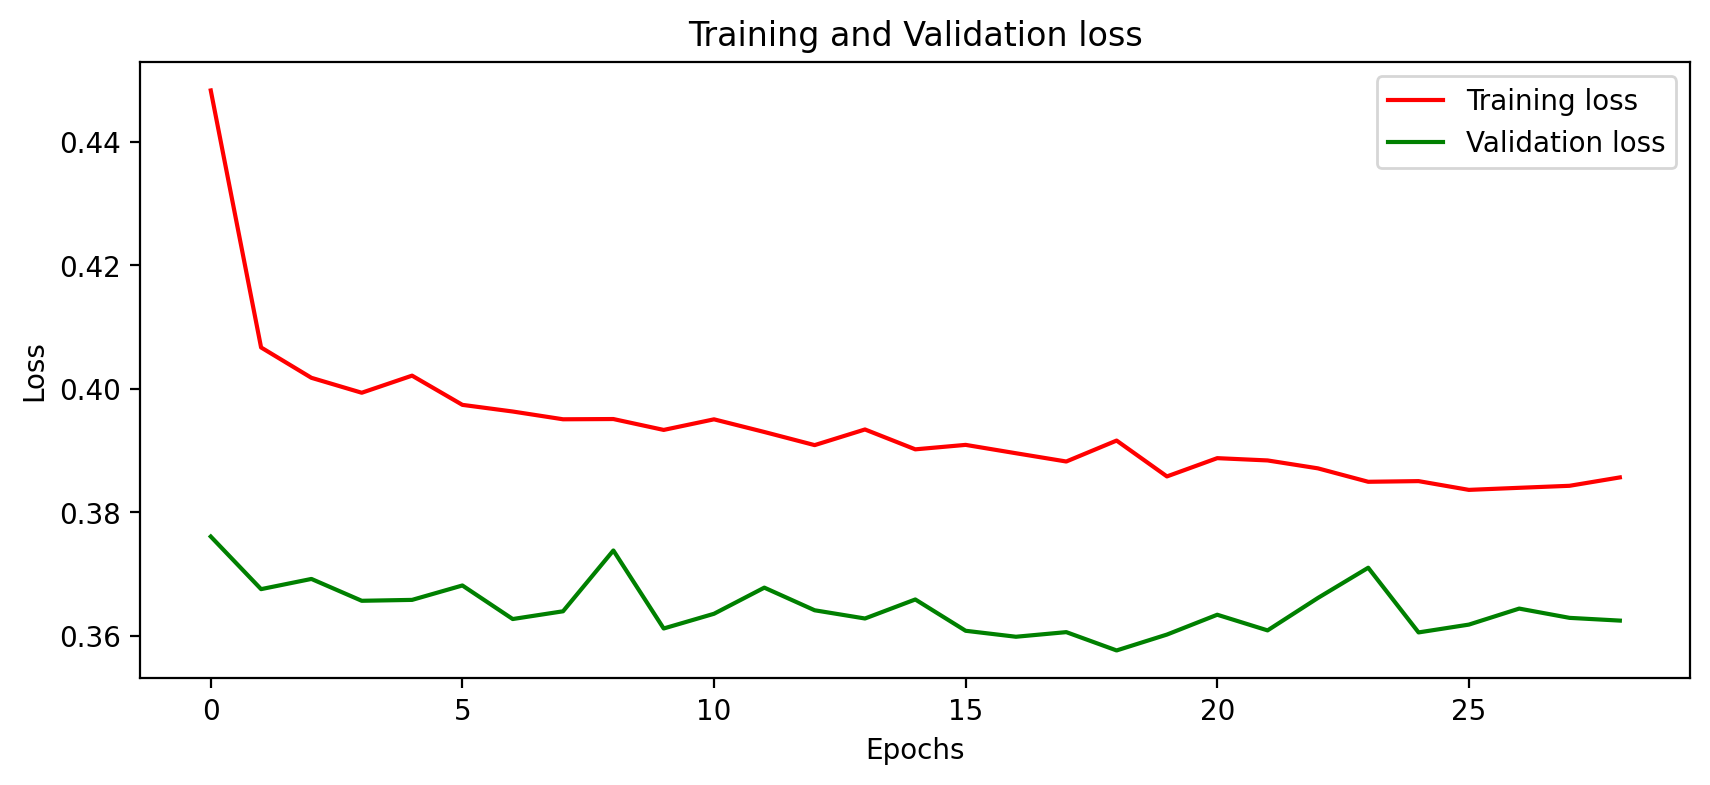

45136
45136
11284
11284


In [30]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize =(10,4),dpi = 200)
plt.plot(history_df.loc[:, ['loss']], "Red", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"Green", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

print(len(y_train))
print(len(scaled_X_train))
print(len(scaled_X_test))
print(len(y_test))

## Model Prediction

In [31]:
y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > 0.5)

353/353 [==============================] - 0s 930us/step


<Axes: >

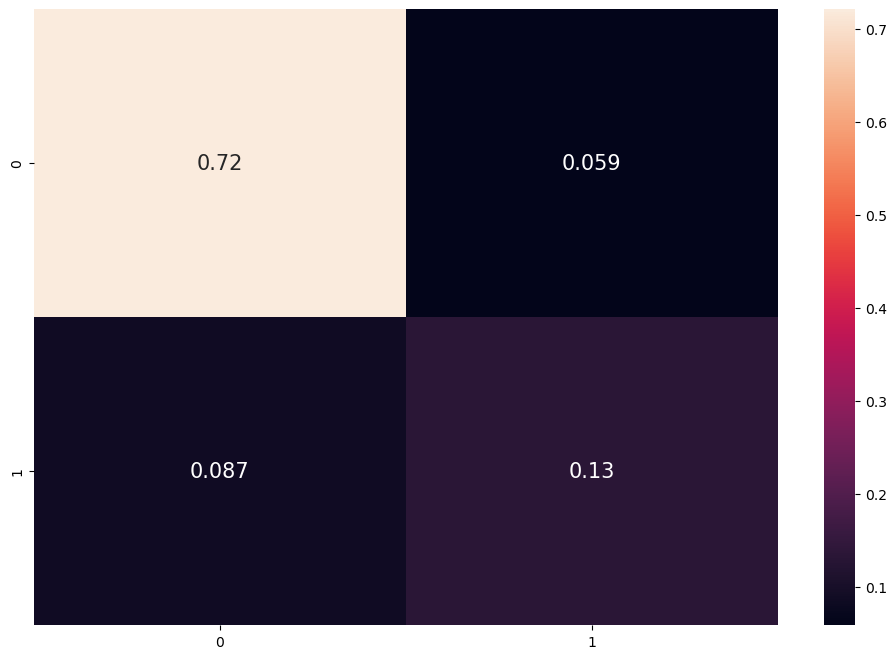

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15})

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8799
           1       0.69      0.61      0.65      2485

    accuracy                           0.85     11284
   macro avg       0.79      0.77      0.78     11284
weighted avg       0.85      0.85      0.85     11284



## Conclusion

### Model accuracy = 85%
### No rain prediction f1-score = 0.91
### Will rain prediction f1-score = 0.65